In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

# Load the dataset
df = pd.read_csv('titanic.txt')
df 


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [19]:
# Preprocess the data (example: fill missing values and encode categorical variables)
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Define features and target variable
X = df.drop(['Survived', 'Name', 'Ticket', 'Cabin','PassengerId'], axis=1)
y = df['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the plot_confusion_matrix function
def plot_confusion_matrix(y_test, y_predicted, labels=None, title='Confusion Matrix'):
    cm = confusion_matrix(y_test, y_predicted)

    # Create a custom colormap: one color for TP+TN, another for FP+FN
    colors = ['lightblue', 'lightcoral']
    custom_cmap = plt.cm.colors.ListedColormap(colors)

    # Define a matrix for coloring based on TP, TN, FP, FN
    colored_cm = np.zeros_like(cm, dtype=int)
    for i in range(len(cm)):
        for j in range(len(cm)):
            if i == j:  # TP or TN
                colored_cm[i, j] = 0
            else:  # FP or FN
                colored_cm[i, j] = 1

    # Plot the confusion matrix with custom colors
    fig, ax = plt.subplots()
    im = ax.imshow(colored_cm, cmap=custom_cmap)

    # Add text annotations
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            color = 'black'  # Text color for better contrast
            ax.text(j, i, cm[i, j], ha='center', va='center', color=color)

    # Add axis labels and titles
    if labels is None:
        labels = ['Class 0', 'Class 1']
    ax.set_xticks(range(len(labels)))
    ax.set_yticks(range(len(labels)))
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')
    ax.set_title(title)

    plt.show()

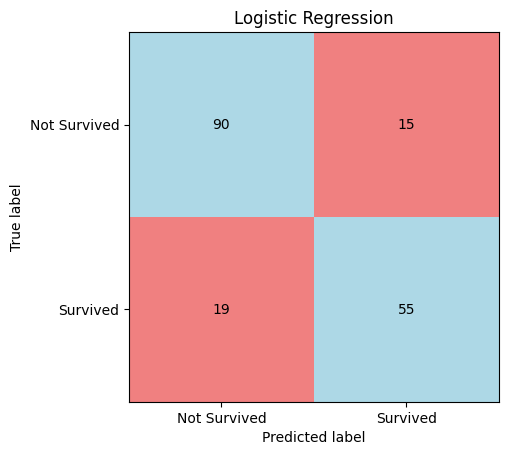

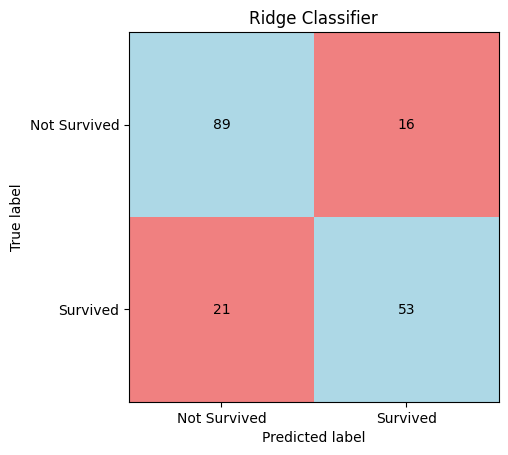

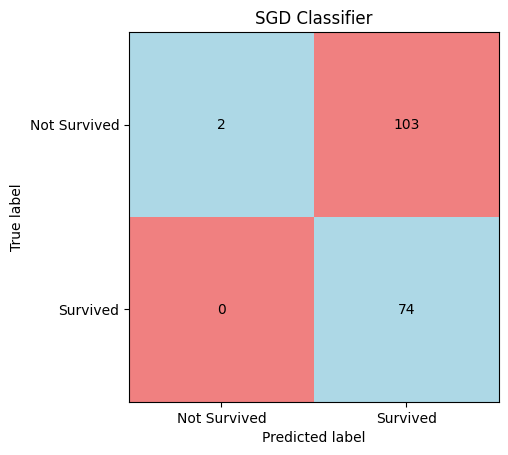

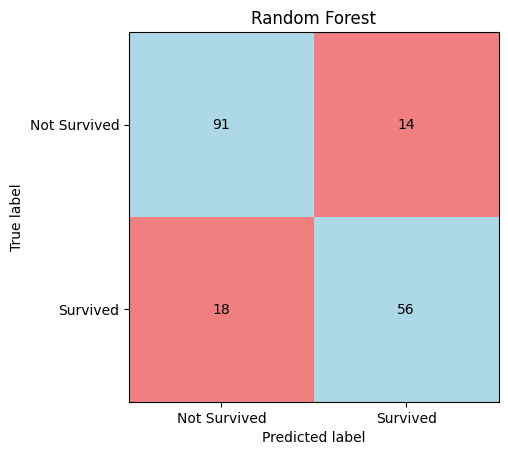

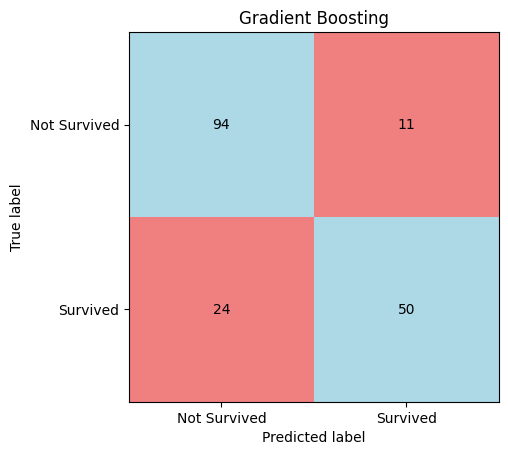

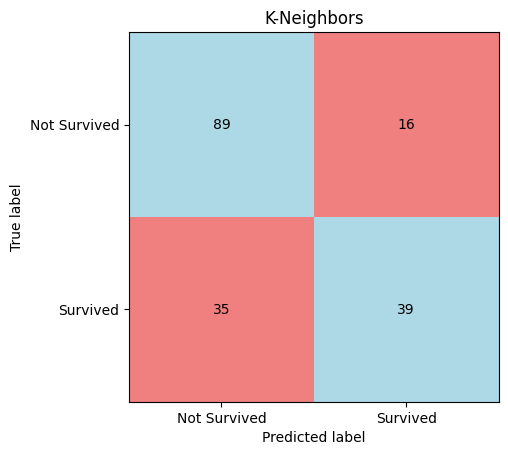

In [20]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Ridge Classifier': RidgeClassifier(random_state=42),
    'SGD Classifier': SGDClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'K-Neighbors': KNeighborsClassifier()
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_predicted = model.predict(X_test)
    plot_confusion_matrix(y_test, y_predicted, labels=['Not Survived', 'Survived'], title=model_name)